# AirBnB Listing Analysis

## Data Prep & QA

In [1]:
# the Listings.csv file
import pandas as pd

listings = pd.read_csv("Listings.csv", encoding="ISO-8859-1", low_memory=False)

In [2]:
# the first few rows of the DataFrame
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [3]:
# quick summary of the DataFrame, including the data types and any missing values.
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [4]:
# Cast host_since column as a datetime format

listings["host_since"] = pd.to_datetime(listings["host_since"])

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [5]:
# Filter the data down to rows where the city is Paris, and 
# keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’

paris_listings = listings.query("city == 'Paris'").loc[:, ["host_since", "neighbourhood", "city", "accommodates", "price"]]
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [6]:
# number of missing values in each column 
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [7]:
# QA the Paris listings data: check for missing values, 
# the minimum, maximum, and average for each numeric field

paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [8]:
# number of missing values in each column for accomodates
paris_listings.query("accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [9]:
# number of missing values missing values in each column for price
paris_listings.query("price == 0").count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [10]:
# number of missing values in each column for accomodates and price
paris_listings.query("accommodates == 0 and price == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

There're no major issues that will impact our analysis

## Prepare for Visualization

In [11]:
# Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' 
# and calculates the mean price (sorted low to high)

paris_listings_neighbourhood = paris_listings.groupby("neighbourhood").agg({"price": "mean"}).sort_values("price")

paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [12]:
# Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood,
# group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ 
# (sorted low to high)

paris_listings_accommodates = (
    paris_listings
    .query("neighbourhood == 'Elysee'").
    groupby("accommodates")
    .agg({"price": "mean"})
    .sort_values("price")
)

paris_listings_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [13]:
# Create a table called paris_listings_overtime grouped by the ‘host_since’ year, 
# and calculate the average price and count of rows representing the number of new hosts

paris_listings_overtime = paris_listings.set_index("host_since").resample("YE").agg({"neighbourhood": "count", "price": "mean"})

paris_listings_overtime.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


## Data Visualization

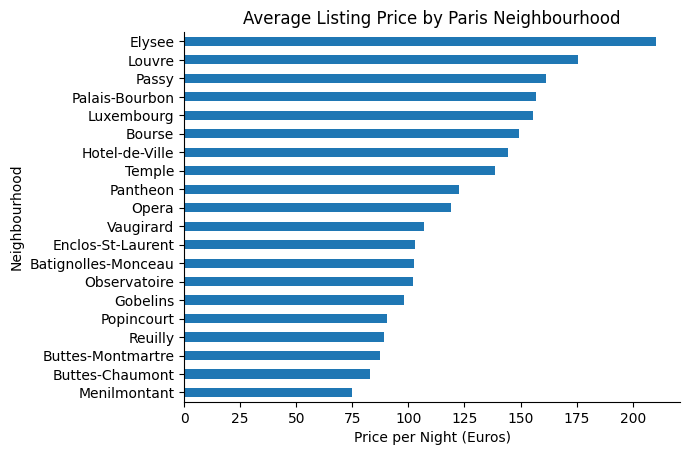

In [14]:
# a horizontal bar chart of the average price by neighborhood in Paris
# used despine() to remove the top and right borders of the chart
import seaborn as sns

(paris_listings_neighbourhood
 .plot
 .barh(
     title="Average Listing Price by Paris Neighbourhood", 
     xlabel="Price per Night (Euros)", 
     ylabel="Neighbourhood", 
     legend=None
 )
)
sns.despine()

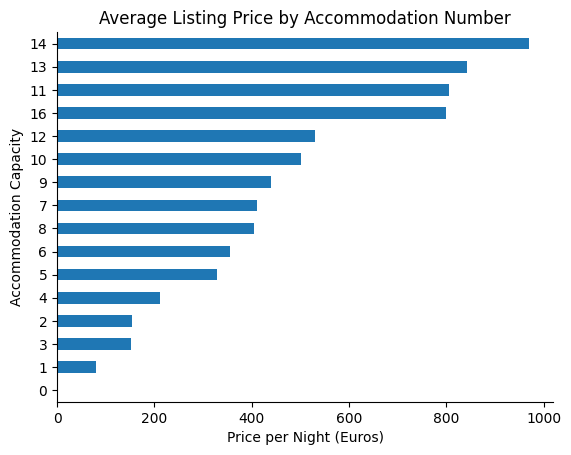

In [15]:
# a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood

(paris_listings_accommodates
 .plot
 .barh(
     title="Average Listing Price by Accommodation Number", 
     xlabel="Price per Night (Euros)", 
     ylabel="Accommodation Capacity", 
     legend=None
 )
)
sns.despine()

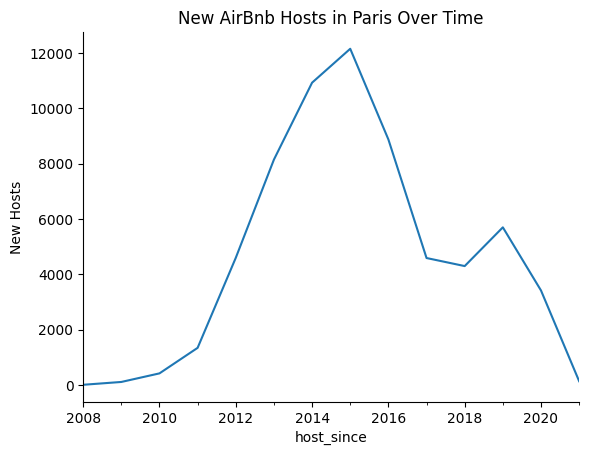

In [16]:
# line chart showing the count of new hosts over time

paris_listings_overtime["neighbourhood"].plot(
    ylabel="New Hosts",
    title="New AirBnb Hosts in Paris Over Time"
)
sns.despine()

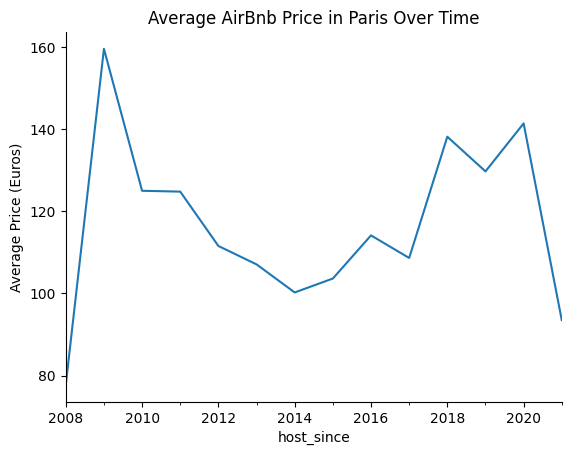

In [17]:
# line chart showing average price over time

paris_listings_overtime["price"].plot(
    ylabel="Average Price (Euros)",
    title="Average AirBnb Price in Paris Over Time"
)
sns.despine()

Text(0.5, 1.0, '2015 Regulations Led to Fewer New Hosts & Higher Prices')

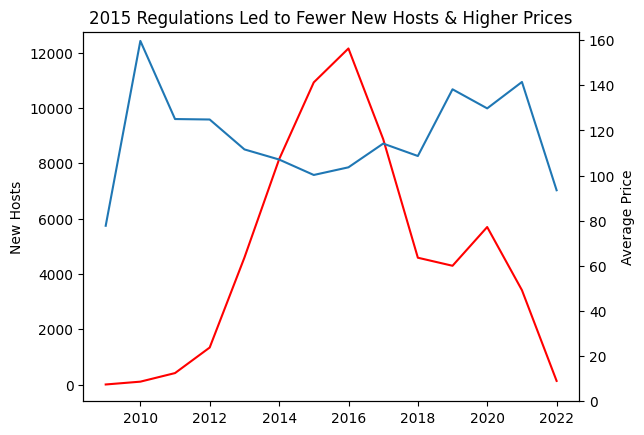

In [18]:
# a dual axis line chart to show both new hosts and average price over time

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(
    paris_listings_overtime.index,
    paris_listings_overtime["neighbourhood"],
    label="New Hosts",
    c="Red"
)
ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot(
    paris_listings_overtime.index,
    paris_listings_overtime["price"],
    label="Average Price"
)
ax2.set_ylim(0)
ax2.set_ylabel("Average Price")

ax.set_title("2015 Regulations Led to Fewer New Hosts & Higher Prices")